In [13]:
import yfinance as yf

In [2]:
google = yf.Ticker("GOOG")

In [3]:
df = google.history(period='1d', interval='1m')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-01-21 09:30:00-05:00,1898.000000,1901.609985,1898.000000,1901.280029,56173,0,0
2021-01-21 09:31:00-05:00,1900.560059,1904.109985,1899.310059,1903.560059,9189,0,0
2021-01-21 09:32:00-05:00,1903.920044,1908.454956,1903.920044,1904.520142,10743,0,0
2021-01-21 09:33:00-05:00,1908.030029,1909.599976,1905.765015,1906.010010,26064,0,0
2021-01-21 09:34:00-05:00,1906.979980,1909.619995,1904.540039,1909.619995,13867,0,0


In [4]:
df[['Low']]

,Low
Datetime,
2021-01-21 09:30:00-05:00,1898.000000
2021-01-21 09:31:00-05:00,1899.310059
2021-01-21 09:32:00-05:00,1903.920044
2021-01-21 09:33:00-05:00,1905.765015
2021-01-21 09:34:00-05:00,1904.540039
...,...
2021-01-21 13:35:00-05:00,1897.060059
2021-01-21 13:36:00-05:00,1896.785034
2021-01-21 13:37:00-05:00,1897.199951


In [8]:
import pandas as pd
df['date'] = pd.to_datetime(df.index).time
df.set_index('date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
09:30:00,1898.000000,1901.609985,1898.000000,1901.280029,56173,0,0
09:31:00,1900.560059,1904.109985,1899.310059,1903.560059,9189,0,0
09:32:00,1903.920044,1908.454956,1903.920044,1904.520142,10743,0,0
09:33:00,1908.030029,1909.599976,1905.765015,1906.010010,26064,0,0
09:34:00,1906.979980,1909.619995,1904.540039,1909.619995,13867,0,0


In [10]:
X = df.index.values
y = df['Low'].values

# The split point is the 10% of the dataframe length 
offset = int(0.10*len(df))

X_train = X[:-offset]
y_train = y[:-offset]
X_test = X[-offset:]
y_test = y[-offset:]


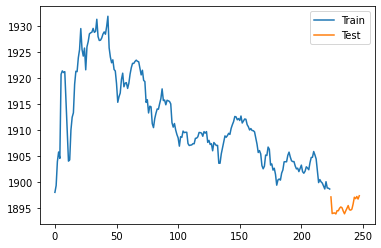

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(0,len(y_train)), y_train, label='Train')
plt.plot(range(len(y_train),len(y)), y_test, label='Test')
plt.legend()
plt.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

In [21]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 1898.635009765625
Real data for time 1: 1897.1199951171875
Pred data for time 1: 1898.5121989982715


In [22]:
import alpaca_trade_api as alpaca